In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
loan_data = pd.read_csv('loan_data.csv')

In [107]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [108]:
loan_data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [109]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [110]:
loan_data['not.fully.paid'].unique()

array([0, 1], dtype=int64)

In [111]:
loan_data['credit.policy'].unique()

array([1, 0], dtype=int64)

Text(0.5, 0, 'FICO')

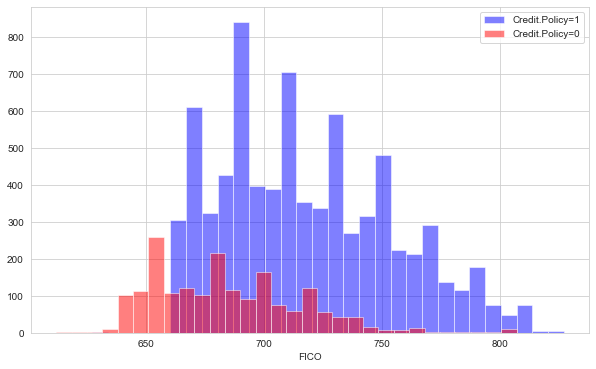

In [112]:
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

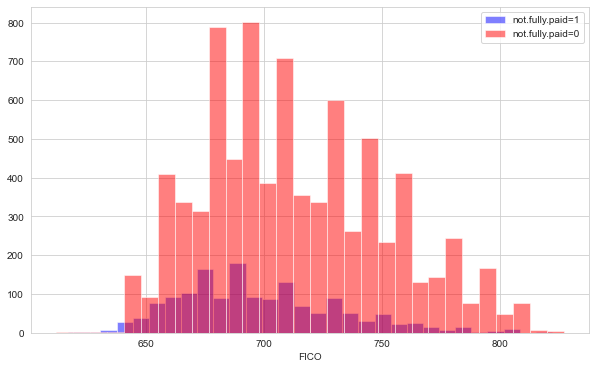

In [113]:
plt.figure(figsize=(10,6))
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Figure size 792x504 with 0 Axes>

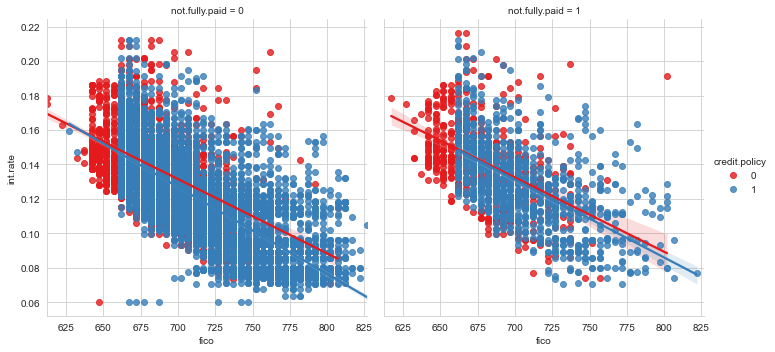

In [114]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan_data,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [115]:
pur =pd.get_dummies(loan_data['purpose'],drop_first=True)

In [116]:
pur.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [117]:
loan_data = pd.concat([loan_data,pur],axis=1)

In [118]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [119]:
loan_data['credit.policy'].unique()

array([1, 0], dtype=int64)

In [120]:
loan_data.drop('purpose',axis=1,inplace=True)

In [121]:
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [122]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  credit_card         9578 non-null   uint8  
 14  debt_consolidation  9578 non-null   uint8  
 15  educational         9578 non-null   uint8  
 16  home_i

In [123]:
X = loan_data.drop('not.fully.paid',axis=1)

In [124]:
y = loan_data['not.fully.paid']

In [125]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [126]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
dtree = DecisionTreeClassifier()

In [131]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [132]:
predd = dtree.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix,classification_report

In [134]:
print(confusion_matrix(y_test,predd))
print('\n')
print(classification_report(y_test,predd))

[[1991  440]
 [ 338  105]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rfc = RandomForestClassifier(n_estimators=600)

In [137]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [138]:
predd = rfc.predict(X_test)

In [139]:
print(confusion_matrix(y_test,predd))
print('\n')
print(classification_report(y_test,predd))

[[2421   10]
 [ 436    7]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.41      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.78      0.84      0.78      2874



# the End